In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
#from numba import njit

In [4]:

def ssa(can):
		initial = [can[14],0,can[15],can[16],0,can[17],0,0,0,0,0,0]
		#y0 = [i*1000 for i in initial]
		y_conc = np.array(initial).astype(int) 
		Y_total = []
		Y_total.append(y_conc)
		t = 0 
		t_end = 100
		T = []   
		T.append(t)
		
		#get kinetic rates 
		y = can[12]
		#A = V/VA
		#sigma = 0.001
		#y = VA/(2*sigma)
		
		
		ka1 = can[0]
		kb1 = can[1]
		kcat1 = can[2]

		ka2 = can[3]
		kb2 = can[4]

		ka3 = can[5]
		kb3 = can[6]

		ka4 = can[7]
		kb4 = can[8]

		ka7 = can[9]
		kb7 = can[10]
		kcat7 = can[11]

		ka5 = can[9]*y
		kb5 = can[10]
		kcat5 = can[11]

		ka6 = can[0]*y
		kb6 = can[1]
		kcat6 = can[2]
		
		N = np.zeros((18,12)) #6 species, 15 reactions
		#L+K -> LK
		N[0,0] = -1 
		N[0,2] = -1 
		N[0,4] = 1

		#LK -> L+K
		N[1,0] = 1
		N[1,2] = 1
		N[1,4] = -1

		#LK -> Lp+K
		N[2,4] = -1
		N[2,1] = 1
		N[2,2] = 1

		#Lp+A -> LpA
		N[3,1] = -1
		N[3,5] = -1
		N[3,6] = 1

		#LpA -> Lp+A
		N[4,1] = 1
		N[4,5] = 1
		N[4,6] = -1
		
		#LpA + K -> LpAK
		N[5,6] = -1 
		N[5,2] = -1
		N[5,7] = 1

		#LpAK -> LpA + K
		N[6,6] = 1
		N[6,2] = 1
		N[6,7] = -1 
		
		#L + LpAK -> LpAKL
		N[7,0] = -1
		N[7,7] = -1
		N[7,10] = 1

		#LpAKL -> L + LpAK
		N[8,0] = 1
		N[8,7] = 1
		N[8,10] = -1

		#LpAKL -> Lp + LpAK
		N[9,10] = -1
		N[9,1] = 1
		N[9,7] = 1

		#Lp + P -> LpP
		N[10,1] = -1
		N[10,3] = -1
		N[10,11] = 1

		#LpP -> Lp + P
		N[11,1] = 1
		N[11,3] = 1
		N[11,11] = -1

		#LpP -> L + P
		N[12,11] = -1
		N[12,0] = 1
		N[12,3] = 1

		#LpA + P -> LpAP
		N[13,6] = -1
		N[13,3] = -1
		N[13,8] = 1

		#LpA + P <- LpAP
		N[14,6] = 1
		N[14,3] = 1
		N[14,8] = -1

		#Lp + LpAP -> LpAPLp
		N[15,1] = -1
		N[15,8] = -1
		N[15,9] = 1

		#Lp + LpAP <- LpAPLp
		N[16,1] = 1
		N[16,8] = 1
		N[16,9] = -1

		#LpAPLp -> L + LpAP
		N[17,9] = -1
		N[17,0] = 1
		N[17,8] = 1 
		
		while t < t_end:
			#choose two random numbers 
			r = np.random.uniform(size=2)
			r1 = r[0] 
			r2 = r[1] 					
			
			#get propensities
			a = np.zeros(18)
			a[0] = ka1*y_conc[0]*y_conc[2] 
			a[1] = kb1*y_conc[4]
			a[2] = kcat1*y_conc[4]  
			
			a[3] = ka2*y_conc[1]*y_conc[5] 
			a[4] = kb2*y_conc[6]

			a[5] = ka3*y_conc[6]*y_conc[2]
			a[6] = kb3*y_conc[7]

			a[7] = ka6*y_conc[0]*y_conc[7]
			a[8] = kb6*y_conc[10]
			a[9] = kcat6*y_conc[10]

			a[10] = ka7*y_conc[1]*y_conc[3]
			a[11] = kb7*y_conc[11]
			a[12] = kcat7*y_conc[11]

			a[13] = ka4*y_conc[6]*y_conc[3]
			a[14] = kb4*y_conc[8]

			a[15] = ka5*y_conc[1]*y_conc[8]
			a[16] = kb5*y_conc[9]
			a[17] = kcat5*y_conc[9]  
			
			asum = np.cumsum(a)
			a0 = np.sum(a)  
			#get tau
			tau = (1.0/a0)*np.log(1.0/r1)     
		
			#select reaction 
			reaction_number = np.argwhere(asum > r2*a0)[0,0] #get first element			
		
			#update concentrations
			y_conc = y_conc + N[reaction_number,:]   	
			Y_total.append(y_conc) 
			#update time
			t = t + tau  
			T.append(t)
		T = np.array(T) 
		Y_total = np.array(Y_total)   
		return T, Y_total 

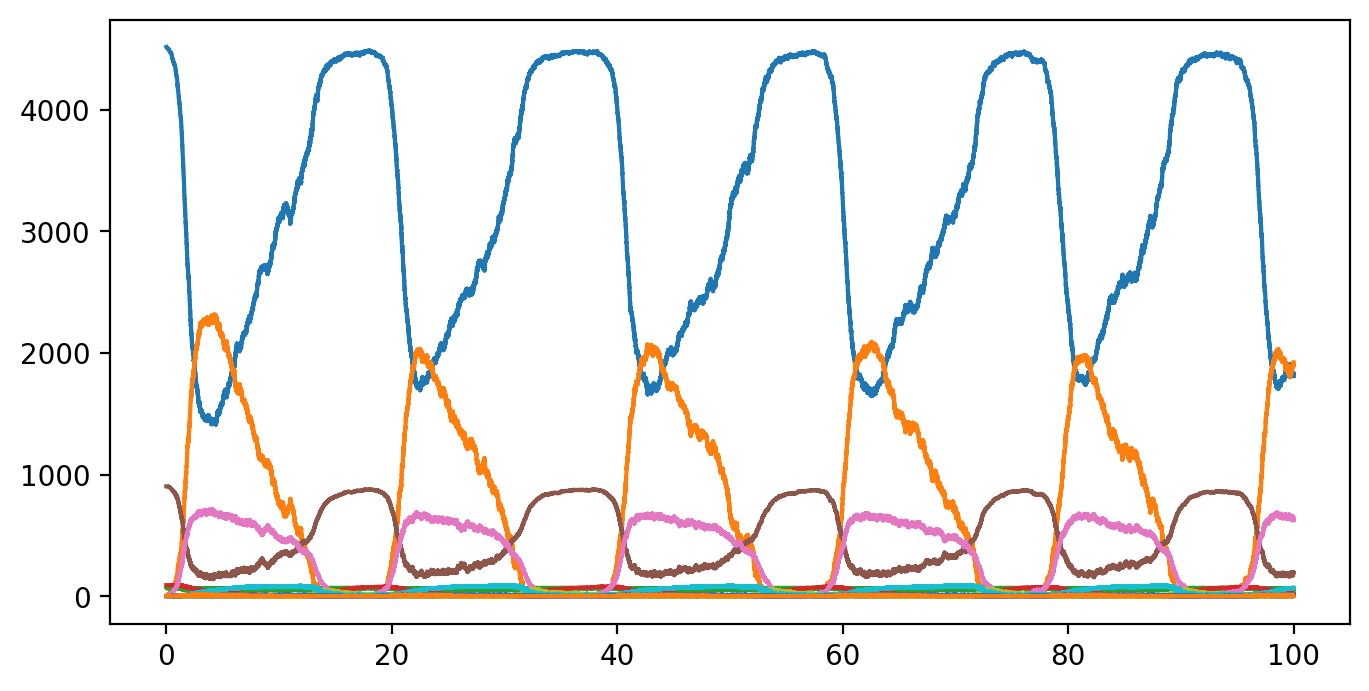

In [5]:

candidate = [0.00029618738483467037, 7.686604351412696, 500, 0.0033210781343476934, 1.8274442883567392, 0.050042137015268634, 379.79344838656317, 0.0005253224152058502, 0.49574586107169005, 0.0033210781343476934, 13.266634054571963, 33.91475227547318, 750.0, 1.0, 4517.25, 67.20545293605097, 90.53945662552576, 903.45]
#candidate = [2.57604033e-01, 9.27513075e+01, 4.64237733e+02, 2.72204637e-01, 3.09879237e+01, 7.57504555e+01, 2.82139476e+02, 8.89308133e-01,
# 1.35296875e+00, 8.95890619e-01, 6.04577304e+01, 2.99879646e+01,
# 1.22303797e+00, 1.04296985e+01, 6.47783790e-01, 9.13425683e-01,
# 2.01242117e+00]

T, Y_total = ssa(candidate)
Y_total = Y_total

fig = plt.figure(figsize=(8,4),dpi=200)
plt.plot(T,Y_total)

In [66]:
def example(ar):

    for i in range(100):
        ar = ar*0.1
    return ar

In [68]:
%timeit example(Y_total)



2.33 s ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [77]:
@numba.njit
def numba_example(ar):

    for i in range(100):
        ar = ar*0.1
    return ar

In [78]:
%timeit numba_example(Y_total)

4 s ± 7.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:


@numba.jit(nopython=True)
def sum_numba(ar):
    return ar.sum()

# Make dummy array for testing
ar = np.array([0.3, 0.4, 0.3, 0.2, 0.15])

print('\nNumPy sum:')
%timeit ar.sum()

print('\nNumba sum:')
%timeit sum_numba(ar)




NumPy sum:
1.32 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

Numba sum:
174 ns ± 0.54 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
